# Модел на Дорнбуш (лекция 7 декември 2023 г.)

$$  ∆E/E = (∆M/M - ∆M*/M*) + (∆L*/L* - ∆L/L) + (∆Θ/Θ - ∆Θ*/Θ*) $$
<br>
Където  * означава чужбина
<br>
Е – номинален валутен курс, измерен с единици национална валута за 1 единица чуждестранна валута
<br>
∆E/E темп на изменение на номиналния валутен курс
<br>
M парична маса в страната, М* парична маса в друга държава
<br>
∆M/M темп на изменение на паричен агрегат с най-устойчива динамика
<br>
∆M*/M* темп на изменение на паричен агрегат в другата държава
<br>
L реално търсене на пари (национална валута), L* реално търсене на пари в другата държава
<br>
∆L/L темп на изменение на реалното търсене на пари
<br>
∆L*/L* темп на изменение на реалното търсене на пари в другата държава
<br>
Θ относителна цена на търгуемите стоки (PT= Θ.P, Θ=PT/P), Θ* относителна цена на търгуемите стоки в другата държава (PT*= Θ*.P*, Θ*=PT*/P*)
<br>
∆Θ/Θ темп на изменение на относителната цена на търгуемите стоки
<br>
∆Θ*/Θ* темп на изменение на относителната цена на търгуемите стоки в чужбина

Задача:
<br>
Изберете две от държавите, представени във файла. Като използвате наличната информация за тях проверете доколко резултатите от прилагането на модела на Дорнбуш се доближават до реализирания валутен курс между двете държави.
Трябва да проявите креативност в избора на данни и обработката им преди да изчислите модела на Дорнбуш.
Препоръчвам да спазвате следните стъпки:
<br>
1. Изчислете динамиката на номиналния валутен курс между двете държави.
<br>
2. Изчислете  (∆M/M - ∆M*/M*).
<br>
3. Сравнете резултата от стъпка 2 с резултата от стъпка 1.
<br>
4. Дефлирайте стойността на паричните агрегати в края на годината с индекс на цени при база избрана от вас година, която е еднаква и за двете държанви, и след това изчислете темп на изменение на реалните пари
<br>
5. Приемаме,че темпа на изменение, изчислен по т. 4 отчита динамиката на търсенето на реални пари (∆L*/L* - ∆L/L)
<br>
6. Изчислете  (∆M/M - ∆M*/M*) + (∆L*/L* - ∆L/L) и сравнете с резултата по т. 1
<br>
7. Изчислете относителната цена на търггуемите стоки като разделите индекс на цени на стоките с общ индекс на цени, изчислени при една и съща базисна година.
<br>
8. Изчислете (∆Θ/Θ - ∆Θ*/Θ*)
<br>
9. Изчислете  (∆M/M - ∆M*/M*) + (∆L*/L* - ∆L/L) + (∆Θ/Θ - ∆Θ*/Θ*)
<br>
10. Сравнете резултата от стъпка 10 с резултата от стъпка 1.


Изчислете (∆M/M - ∆M*/M*).

In [3]:
import pandas as pd
from matplotlib import pyplot as plt

In [40]:
deltaE = pd.read_csv(r"D:\dornbush\DEXUSEU.csv")
deltaE.rename(columns={'DEXUSEU_CH1': '∆E/E'}, inplace=True)
deltaE['DATE'] = pd.to_datetime(deltaE['DATE'], format='%Y-%m-%d')
print(deltaE)

         DATE      ∆E/E
0  2006-01-01  0.011422
1  2007-01-01  0.114770
2  2008-01-01  0.101497
3  2009-01-01 -0.079013
4  2010-01-01 -0.067458
5  2011-01-01  0.067044
6  2012-01-01 -0.107259
7  2013-01-01  0.042265
8  2014-01-01  0.001531
9  2015-01-01 -0.220061
10 2016-01-01 -0.002415


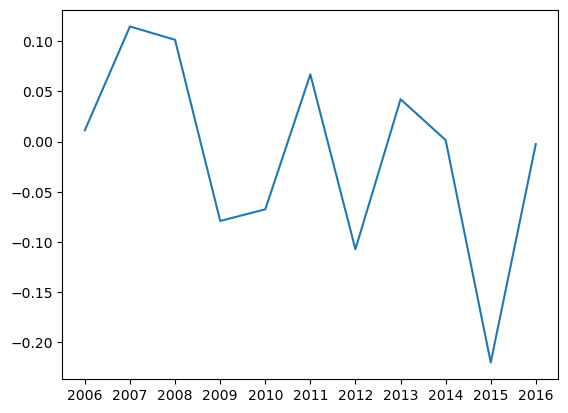

In [41]:
plt.plot(deltaE['DATE'], deltaE['∆E/E'])

2.Изчислете (∆M/M - ∆M*/M*).
<br>
От страницата на ФРЕД използвам 10 годишен период и променям графиката да ми показва "Percentage change from Year Ago",
след което правя същото за Еврозоната и го добавям към вече съществуващата графика за САЩ: 
    https://fred.stlouisfed.org/graph/?g=1cYZ5

In [44]:
# Данните се импортват от тип CSV като се премахва ".", за да не го чете като текст
M2UE = pd.read_csv(r"D:\dornbush\fredgraph.csv", na_values = ['.'])
# Колоните се преименуват за четимост
M2UE.rename(columns={'MYAGM2USM052S_PC1': '∆M/M', 'MYAGM2EZM196N_PC1': '∆M*/M*'}, inplace=True)
# Колоната дата трябва да бъде от тип дата
M2UE['DATE'] = pd.to_datetime(M2UE['DATE'], format='%Y-%m-%d')
# Колоните за делта М2 трябва да са от тип десетичен знак
M2UE['∆M/M'] = M2UE['∆M/M'].astype(float)
M2UE['∆M*/M*'] = M2UE['∆M*/M*'].astype(float)
# Колона с разликата между двата агрегата
M2UE['(∆𝑀/𝑀−∆𝑀∗/𝑀∗)'] = M2UE['∆M/M'] - M2UE['∆M*/M*']
# Печатане на крайна таблица
print(M2UE)

         DATE     ∆M/M    ∆M*/M*  (∆𝑀/𝑀−∆𝑀∗/𝑀∗)
0  2006-01-01  5.25211   8.98263       -3.73052
1  2007-01-01  6.30146  10.18525       -3.88379
2  2008-01-01  7.11103  10.30564       -3.19461
3  2009-01-01  7.87930   5.31388        2.56542
4  2010-01-01  2.23966   1.96501        0.27465
5  2011-01-01  6.98010   2.37551        4.60459
6  2012-01-01  8.52032   3.47642        5.04390
7  2013-01-01  6.74042   3.74130        2.99912
8  2014-01-01  6.20085   2.83917        3.36168
9  2015-01-01  5.88013   6.09081       -0.21068
10 2016-01-01  6.75075   5.07517        1.67558


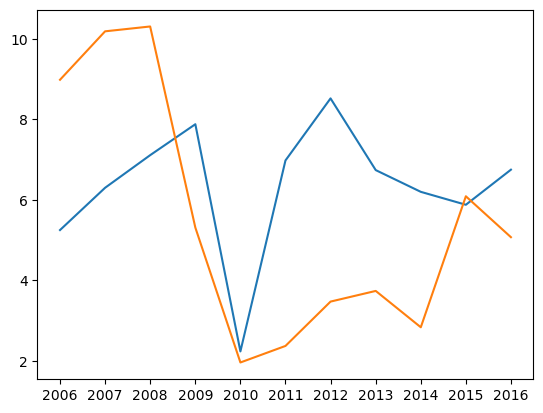

In [35]:
plt.plot(M2UE["DATE"], M2UE['DeltaM_USA'], M2UE["DATE"], M2UE['DeltaM_Eurozone'])

4.Дефлирайте стойността на паричните агрегати в края на годината с индекс на цени при база избрана от вас година, която е еднаква и за двете държави, и след това изчислете темп на изменение на реалните пари

In [28]:
HICP = pd.read_excel(r"D:\dornbush\prc_hicp_aind_page_spreadsheet.xlsx", sheet_name = "Sheet 1")
HICP.rename(columns={'Euro area': 'Euro_HICP', 'United States': 'USA_HICP'}, inplace=True)
HICP['TIME'] = pd.to_datetime(HICP['TIME'], format='%Y')
print(HICP)

         TIME  Euro_HICP  USA_HICP
0  2006-01-01      86.64     85.16
1  2007-01-01      88.49     87.40
2  2008-01-01      91.38     91.22
3  2009-01-01      91.65     90.46
4  2010-01-01      93.14     92.66
5  2011-01-01      95.66     96.20
6  2012-01-01      98.05     98.23
7  2013-01-01      99.38     99.46
8  2014-01-01      99.81    100.76
9  2015-01-01     100.00    100.00
10 2016-01-01     100.23    100.57


In [29]:
M2Log = pd.read_csv(r"D:\dornbush\M2Log.csv")
M2Log.rename(columns={'MYAGM2USM052S': 'M2_USA_log', 'MYAGM2EZM196N': 'M2_Euro_log', 'DATE' : 'TIME'}, inplace=True)
M2Log['TIME'] = pd.to_datetime(M2Log['TIME'], format='%Y-%m-%d')
print(M2Log)

         TIME  M2_USA_log  M2_Euro_log
0  2006-01-01    29.55768     29.48319
1  2007-01-01    29.61879     29.58019
2  2008-01-01    29.68749     29.67827
3  2009-01-01    29.76333     29.73005
4  2010-01-01    29.78548     29.74951
5  2011-01-01    29.85295     29.77298
6  2012-01-01    29.93472     29.80716
7  2013-01-01    29.99995     29.84389
8  2014-01-01    30.06011     29.87188
9  2015-01-01    30.11725     29.93101
10 2016-01-01    30.18257     29.98051


In [37]:
M2LOGHICP = pd.merge(M2Log, HICP, on = "TIME")
M2LOGHICP["Deflator_USA"] = M2LOGHICP["M2_USA_log"] / M2LOGHICP["USA_HICP"]
M2LOGHICP["Deflator_EU"] = M2LOGHICP["M2_Euro_log"] / M2LOGHICP["Euro_HICP"]
M2LOGHICP["RateOfChange_USA"] = M2LOGHICP["Deflator_USA"].pct_change()
M2LOGHICP["RateOfChange_EU"] = M2LOGHICP["Deflator_EU"].pct_change()
M2LOGHICP["RateOfChange_RealMoney"] = M2LOGHICP["RateOfChange_EU"] - M2LOGHICP["RateOfChange_USA"]
print(M2LOGHICP)

         TIME  M2_USA_log  M2_Euro_log  Euro_HICP  USA_HICP  Deflator_USA  \
0  2006-01-01    29.55768     29.48319      86.64     85.16      0.347084   
1  2007-01-01    29.61879     29.58019      88.49     87.40      0.338888   
2  2008-01-01    29.68749     29.67827      91.38     91.22      0.325449   
3  2009-01-01    29.76333     29.73005      91.65     90.46      0.329022   
4  2010-01-01    29.78548     29.74951      93.14     92.66      0.321449   
5  2011-01-01    29.85295     29.77298      95.66     96.20      0.310322   
6  2012-01-01    29.93472     29.80716      98.05     98.23      0.304741   
7  2013-01-01    29.99995     29.84389      99.38     99.46      0.301628   
8  2014-01-01    30.06011     29.87188      99.81    100.76      0.298334   
9  2015-01-01    30.11725     29.93101     100.00    100.00      0.301173   
10 2016-01-01    30.18257     29.98051     100.23    100.57      0.300115   

    Deflator_EU  RateOfChange_USA  RateOfChange_EU  RateOfChange_RealMoney 

6. Изчислете (∆M/M - ∆M*/M*) + (∆L*/L* - ∆L/L) и сравнете с резултата по т. 1